In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import GroupKFold
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import sys; sys.path.append("kuma_utils/")
from kuma_utils.preprocessing.imputer import LGBMImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

os.environ["CUDA_VISIBLE_DEVICES"] = str(1)
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
# config.gpu_options.per_process_gpu_memory_fraction = fraction
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)

In [2]:
tr = pd.read_csv('tr.csv')
ts = pd.read_csv('ts.csv')

# tr["loading"] = np.log(tr["loading"])
# ts["loading"] = np.log(tr["loading"])

In [3]:
# tr.drop('m_3_missing', axis=1, inplace=True)
# ts.drop('m_3_missing', axis=1, inplace=True)
# tr.drop('m_5_missing', axis=1, inplace=True)
# ts.drop('m_5_missing', axis=1, inplace=True)

In [4]:
cat_pr=[f'attribute_{i}' for i in range(4)]
for column in cat_pr:
    label_encoder = LabelEncoder()
    label_encoder.fit(tr[column].append(ts[column]))
    tr[column] = label_encoder.transform(tr[column])
    ts[column] = label_encoder.transform(ts[column])

In [5]:
cols_to_use = []
for col in tr.columns :
    if col=='product_code' or col=='id' or col=='failure':
        continue
    cols_to_use.append(col)
print(cols_to_use)

['loading', 'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17', 'attribute_0', 'attribute_1', 'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2', 'm_3_missing', 'm_5_missing']


In [6]:
scaler = StandardScaler()
training=scaler.fit_transform(tr[cols_to_use])
testing=scaler.fit_transform(ts[cols_to_use])
print(training.shape)

(26570, 25)


In [7]:
df = pd.read_csv("./dataset/train.csv")
sub = pd.read_csv(f'./dataset/sample_submission.csv')
y = df.failure
X_train, X_test, y_train, y_test=train_test_split(training,y,random_state=28,shuffle=True,test_size=0.2)

In [9]:
tf.random.set_seed(3)
model_14 = tf.keras.Sequential([
#   tf.keras.layers.Dense(512, activation="relu"),
#   tf.keras.layers.Reshape((1, 512)),
#   keras.layers.BatchNormalization(),
#   tf.keras.layers.Dropout(0.1),    
#   tf.keras.layers.Conv1D(128, 3, activation='relu', kernel_initializer='he_normal', padding='same'),
#   keras.layers.BatchNormalization(),    
#   tf.keras.layers.Dropout(0.1),    
#   tf.keras.layers.Conv1D(64, 3, activation='relu', kernel_initializer='he_normal', padding='same'),
#   keras.layers.BatchNormalization(),    
#   tf.keras.layers.Dropout(0.1),    
#   tf.keras.layers.Conv1D(32, 3, activation='relu', kernel_initializer='he_normal', padding='same'),
#   keras.layers.BatchNormalization(),    
#   tf.keras.layers.Dropout(0.1),    
#   tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation="tanh"),
#   keras.layers.BatchNormalization(),    
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation="tanh"),
#   keras.layers.BatchNormalization(),    
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation="tanh"),
#   keras.layers.BatchNormalization(),    
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation="tanh"),
#   keras.layers.BatchNormalization(),    
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation="tanh"),
#   keras.layers.BatchNormalization(),    
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation="tanh"),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])


# input_ = Input(shape=(26))
# x = tf.keras.layers.Dense(100, activation="tanh")(input_)
# x = keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Dropout(0.1)(x)
# branch_1 = tf.keras.layers.Dense(100, activation="tanh", name='branch_1')(x)

# branch_1_left = tf.keras.layers.Dense(100, activation="tanh")(branch_1)
# branch_1_left = keras.layers.BatchNormalization()(branch_1_left)
# branch_1_left = tf.keras.layers.Dropout(0.1)(branch_1_left)

# branch_1_right = tf.keras.layers.Dense(100, activation="tanh")(branch_1)
# branch_1_right = keras.layers.BatchNormalization()(branch_1_right)
# branch_1_right = tf.keras.layers.Dropout(0.1)(branch_1_right)

# branch_1_left_left = tf.keras.layers.Dense(100, activation="tanh")(branch_1_left)
# branch_1_left_left = keras.layers.BatchNormalization()(branch_1_left_left)
# branch_1_left_left = tf.keras.layers.Dropout(0.1)(branch_1_left_left)

# branch_1_left_right = tf.keras.layers.Dense(100, activation="tanh")(branch_1_left)
# branch_1_left_right = keras.layers.BatchNormalization()(branch_1_left_right)
# branch_1_left_right = tf.keras.layers.Dropout(0.1)(branch_1_left_right)

# branch_1_right_left = tf.keras.layers.Dense(100, activation="tanh")(branch_1_right)
# branch_1_right_left = keras.layers.BatchNormalization()(branch_1_right_left)
# branch_1_right_left = tf.keras.layers.Dropout(0.1)(branch_1_right_left)

# branch_1_right_right = tf.keras.layers.Dense(100, activation="tanh")(branch_1_right)
# branch_1_right_right = keras.layers.BatchNormalization()(branch_1_right_right)
# branch_1_right_right = tf.keras.layers.Dropout(0.1)(branch_1_right_right)

# x = tf.keras.layers.Concatenate()([branch_1_left_left, branch_1_left_right, branch_1_right_left, branch_1_right_right])
# x = tf.keras.layers.Dense(512, activation="tanh")(x)
# x = keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Dropout(0.1)(x)
# x = tf.keras.layers.Dense(512, activation="tanh")(x)
# x = keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Dropout(0.1)(x)
# x = tf.keras.layers.Dense(256, activation="tanh")(x)
# x = keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Dropout(0.1)(x)
# x = tf.keras.layers.Dense(128, activation="tanh")(x)
# x = keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Dropout(0.1)(x)
# x = tf.keras.layers.Dense(32, activation="tanh")(x)
# x = keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Dropout(0.1)(x)
# x = tf.keras.layers.Dense(1, activation="sigmoid")(x)
# model_14 = Model(inputs=[input_],outputs = [x])


plot_model(model_14, show_shapes=True, show_layer_names=True,to_file='model.png')

save_dir = "./checkpoint/"
filepath = "model.h5"
early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=30, restore_best_weights=True)
# early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=20)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1 ,patience=4)
checkpoint = ModelCheckpoint(os.path.join(save_dir, filepath), monitor='val_loss', verbose=0, save_best_only=True,mode='auto')
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/10))

model_14.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=1e-4*7),
                 metrics=["AUC"])
# model_14.compile(loss=tf.keras.losses.BinaryCrossentropy(),
#                  optimizer=tf.keras.optimizers.Adam(lr=1e-4*7))


history = model_14.fit(X_train,y_train,epochs=200,callbacks=[early_stopping, reduce_lr, checkpoint], validation_data=(X_test, y_test))
print(model_14.summary())

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
665/665 [==============================] - 3s 3ms/step - loss: 0.5365 - auc: 0.5344 - val_loss: 0.5161 - val_auc: 0.5857
Epoch 2/200
665/665 [==============================] - 2s 3ms/step - loss: 0.5170 - auc: 0.5549 - val_loss: 0.5228 - val_auc: 0.5834
Epoch 3/200
665/665 [==============================] - 2s 3ms/step - loss: 0.5139 - auc: 0.5617 - val_loss: 0.5188 - val_auc: 0.5877
Epoch 4/200
665/665 [==============================] - 2s 3ms/step - loss: 0.5124 - auc: 0.5701 - val_loss: 0.5150 - val_auc: 0.5787
Epoch 5/200
665/665 [==============================] - 2s 3ms/step - loss: 0.5123 - auc: 0.5681 - val_loss: 0.5140 - val_auc: 0.5922
Epoch 6/200
665/665 [==============================] - 2s 2ms/step - loss: 0.5115 - auc: 0.5746 - val_loss: 0.5133 - val_auc: 0.5934
Epoch 7/200
665/665 [==============================] - 2s 3ms/step - loss: 0.5102 - auc: 0.5793 - val_loss: 0.5131 - val_auc: 0.5911
Epoch 8/200
665/665 [==============================] - 2s 3ms/step - 

<Figure size 432x288 with 0 Axes>

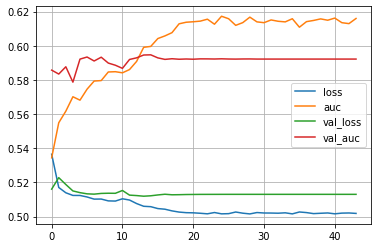

In [10]:
plt.figure()
df = pd.DataFrame(history.history)
df.drop('lr', axis=1, inplace=True)
# df.drop('loss', axis=1, inplace=True)
# df.drop('val_loss', axis=1, inplace=True)
df.plot()
plt.grid()
plt.show()

In [11]:
model_14 = load_model(f"{save_dir}/{filepath}")

In [12]:
preds=model_14.predict(testing)
preds=preds.reshape(20775,)
submission = pd.DataFrame({'id': sub.id,'failure': preds})
submission.to_csv('submission.csv', index=False)
submission

,id,failure
0,26570,0.199923
1,26571,0.121280
2,26572,0.184835
3,26573,0.192118
4,26574,0.365028
...,...,...
20770,47340,0.212433
20771,47341,0.124020
20772,47342,0.125254
20773,47343,0.214250
